/tmp/ipython-input-1-2276250319.py:95: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_categories)) # Get a colormap
/tmp/ipython-input-1-2276250319.py:128: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # Adjust layout to prevent labels from overlapping
/tmp/ipython-input-1-2276250319.py:128: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout() # Adjust layout to prevent labels from overlapping
/tmp/ipython-input-1-2276250319.py:128: UserWarning: Glyph 2380 (\N{DEVANAGARI VOWEL SIGN AU}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # Adjust layout to prevent labels from overlapping
/tmp/ipython-input-1-2276250319.py:128: UserWarning: Glyph 2306 (\N{DEVANAGARI S

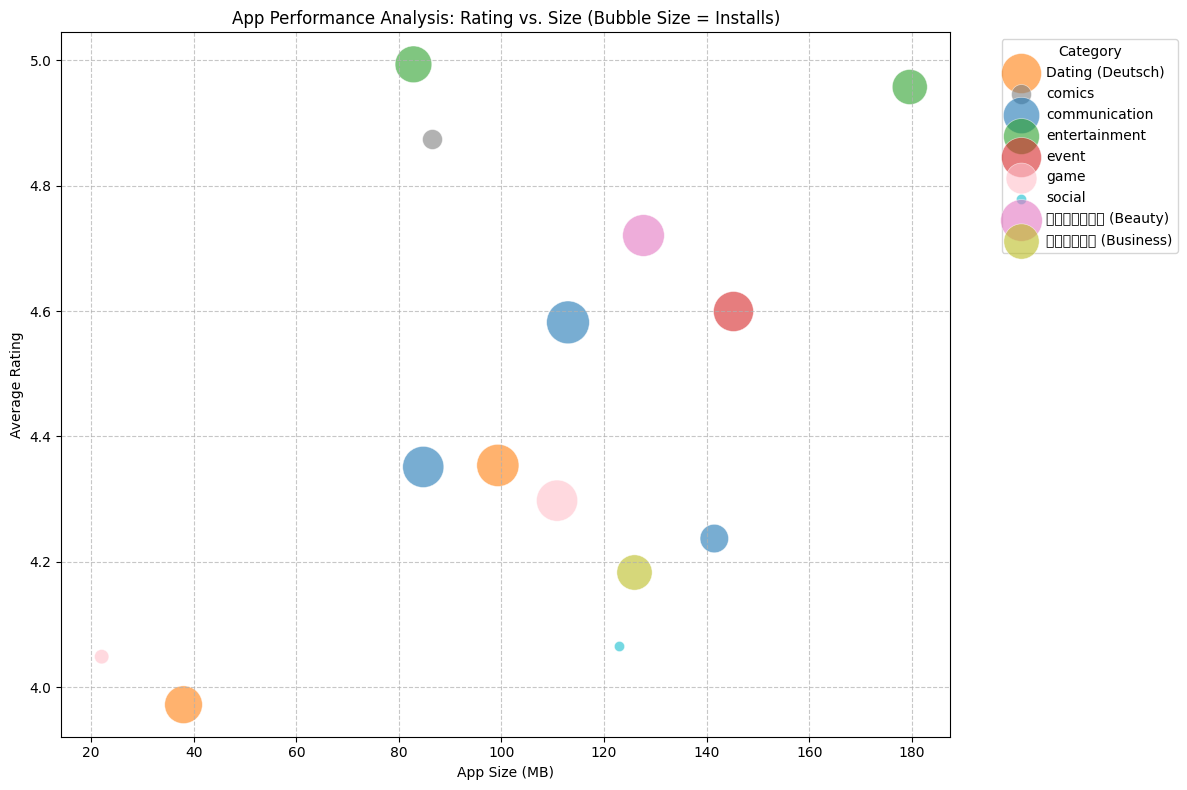

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, time
import random

# --- 1. Generate Sample Data ---
# In a real scenario, you would load your data from a CSV, database, etc.
# For demonstration, we create a synthetic dataset.
data = {
    'App Name': [
        'GameZone', 'BeautyPlus', 'BizConnect', 'ComicVerse', 'ChatApp',
        'DateMate', 'FunTime', 'SocialSphere', 'EventHub', 'FitnessPal',
        'GameMania', 'GlamourApp', 'ProBiz', 'MangaReader', 'TalkNow',
        'LoveLink', 'PartyPlanner', 'Connectify', 'RelaxZone', 'StudyBuddy',
        'RacingGame', 'MakeupGuru', 'TradeFlow', 'WebComics', 'CallMe',
        'FlirtApp', 'MovieNight', 'FriendFeed', 'MeetUpNow', 'HealthTrack'
    ],
    'Category': [
        'game', 'beauty', 'business', 'comics', 'communication',
        'dating', 'entertainment', 'social', 'event', 'health',
        'game', 'beauty', 'business', 'comics', 'communication',
        'dating', 'event', 'social', 'entertainment', 'education',
        'game', 'beauty', 'business', 'comics', 'communication',
        'dating', 'entertainment', 'social', 'event', 'health'
    ],
    'App Size (MB)': [
        random.uniform(10, 200) for _ in range(30)
    ],
    'Average Rating': [
        random.uniform(3.0, 5.0) for _ in range(30)
    ],
    'Installs': [
        random.randint(10000, 1000000) for _ in range(30)
    ],
    'Reviews': [
        random.randint(100, 10000) for _ in range(30)
    ],
    'Sentiment Subjectivity': [
        random.uniform(0.1, 0.9) for _ in range(30)
    ]
}
df = pd.DataFrame(data)

# --- 2. Time-based Display Logic ---
def should_display_chart():
    """
    Checks if the current time is between 5 PM IST and 7 PM IST.
    """
    now_utc = datetime.utcnow()
    # IST is UTC+5:30
    now_ist_hour = (now_utc.hour + 5) % 24
    now_ist_minute = (now_utc.minute + 30) % 60
    if now_ist_minute >= 60:
        now_ist_hour = (now_ist_hour + 1) % 24
        now_ist_minute -= 60

    current_time_ist = time(now_ist_hour, now_ist_minute)
    start_time = time(17, 0) # 5 PM IST
    end_time = time(19, 0)   # 7 PM IST

    return start_time <= current_time_ist < end_time

if not should_display_chart():
    print("The chart can only be displayed between 5 PM IST and 7 PM IST.")
else:
    # --- 3. Apply Filters ---
    filtered_df = df[
        (df['Average Rating'] > 3.5) &
        (df['Category'].isin([
            'game', 'beauty', 'business', 'comics', 'communication',
            'dating', 'entertainment', 'social', 'event'
        ])) &
        (df['Reviews'] > 500) &
        (~df['App Name'].str.contains('S', case=False, na=False)) & # App name does not contain 'S'
        (df['Sentiment Subjectivity'] > 0.5) &
        (df['Installs'] > 50000)
    ].copy() # Use .copy() to avoid SettingWithCopyWarning

    # --- 4. Translate Categories ---
    # Create a mapping for translations
    category_translations = {
        'beauty': 'सौंदर्य (Beauty)',  # Hindi for Beauty
        'business': 'வணிகம் (Business)', # Tamil for Business
        'dating': 'Dating (Deutsch)', # German for Dating
    }
    # Apply translations to a new column or modify in place
    filtered_df['Displayed Category'] = filtered_df['Category'].replace(category_translations)

    # --- 5. Create the Bubble Chart ---
    plt.figure(figsize=(12, 8))

    # Define colors for categories, highlighting 'game' in pink
    # We'll use a distinct color for each category for better visualization
    unique_categories = filtered_df['Displayed Category'].unique()
    colors = plt.cm.get_cmap('tab10', len(unique_categories)) # Get a colormap
    category_color_map = {cat: colors(i) for i, cat in enumerate(unique_categories)}

    # Override 'game' category color to pink
    if 'game' in filtered_df['Category'].unique():
        # Ensure 'game' is mapped to 'pink' in the displayed category name too
        game_display_name = filtered_df[filtered_df['Category'] == 'game']['Displayed Category'].iloc[0] if not filtered_df[filtered_df['Category'] == 'game'].empty else 'game'
        category_color_map[game_display_name] = 'pink'

    # Plot each category separately to apply specific colors and create legend entries
    for i, (category_name, group) in enumerate(filtered_df.groupby('Displayed Category')):
        # Scale bubble size for better visualization
        # The 's' parameter in scatter takes the area of the circle, so we square root installs
        # and multiply by a factor for visibility.
        bubble_sizes = group['Installs'] / 1000 # Scale installs for better visual representation

        plt.scatter(
            group['App Size (MB)'],
            group['Average Rating'],
            s=bubble_sizes, # Bubble size based on installs
            alpha=0.6, # Transparency
            label=category_name,
            color=category_color_map[category_name],
            edgecolors='w', # White edge for better distinction
            linewidth=0.5
        )

    # --- 6. Add Labels and Title ---
    plt.xlabel('App Size (MB)')
    plt.ylabel('Average Rating')
    plt.title('App Performance Analysis: Rating vs. Size (Bubble Size = Installs)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()